In [1]:
# 1-1-Read and load data

In [2]:
import numpy as np
import pandas as pd
from pandas import read_excel
from pandas import ExcelFile

In [3]:
sleepclinic_df = pd.read_excel('sleep-clinic.xlsx', index_col='Gender')

In [4]:
sleepclinic_df.head(5)

,MaritalStatus,age,NeckDiameter,AbdomenDiameter,PelvicDiameter,Weight,Height,Malampaty,Micrognotia,snoring1,...,DASdepressed,DASimpatient,DASfrightend,DASnowilling,DASworthless,DASirritable,DAStachycardia,DASanxiety,DASanhedonia,Anxiety
Gender,,,,,,,,,,,,,,,,,,,,,
1,2.0,35.0,50.0,136.0,125.0,128.0,172.0,NaN,NaN,NaN,...,2.0,3.0,1.0,2.0,2.0,3.0,2.0,1.0,2.0,1
2,2.0,57.0,42.0,111.0,117.0,84.0,148.0,NaN,NaN,NaN,...,3.0,3.0,1.0,2.0,3.0,3.0,2.0,0.0,3.0,2
1,2.0,NaN,43.0,106.0,107.0,88.0,177.0,NaN,NaN,NaN,...,3.0,1.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,1
1,1.0,NaN,48.0,107.0,105.0,90.0,170.0,NaN,NaN,NaN,...,NaN,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,1
1,2.0,54.0,41.0,98.0,99.0,61.7,156.0,NaN,NaN,NaN,...,1.0,2.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1


In [5]:
sleepclinic_df.dtypes

MaritalStatus      float64
age                float64
NeckDiameter       float64
AbdomenDiameter    float64
PelvicDiameter     float64
                    ...   
DASirritable       float64
DAStachycardia     float64
DASanxiety         float64
DASanhedonia       float64
Anxiety              int64
Length: 72, dtype: object

In [6]:
sleepclinic_df.shape

(201, 72)

In [7]:
# 1-preparing data

In [8]:
# 2-1-cleansing data

In [9]:
# 2-2-Duplicate data

In [10]:
temp_df = sleepclinic_df.append(sleepclinic_df)
temp_df.shape

(402, 72)

In [11]:
temp_df = temp_df.drop_duplicates()
temp_df.shape

(201, 72)

In [12]:
# 2-3-Detect Outliers

In [13]:
def outlier_detect(sleepclinic_df):
    for i in sleepclinic_df.describe().columns:
        Q1=sleepclinic_df.describe().at['25%',i]
        Q3=sleepclinic_df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(sleepclinic_df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(sleepclinic_df[i].median())
            else:
                p.append(j)
        sleepclinic_df[i]=p
    return sleepclinic_df

In [14]:
# 2-4-Missing Data

In [15]:
column_names = sleepclinic_df.columns
Nan_columns = list()

for col in column_names:
    if (True in np.array(sleepclinic_df[col].isnull())):
        Nan_columns.append(col)

Nan_columns

['MaritalStatus',
 'age',
 'NeckDiameter',
 'AbdomenDiameter',
 'PelvicDiameter',
 'Weight',
 'Height',
 'Malampaty',
 'Micrognotia',
 'snoring1',
 'hypersomnia',
 'insomnia',
 'abnormalmovement',
 'familyhistory',
 'morninghedeache',
 'Decreasefocus',
 'Sweating',
 'Fasciculation',
 'Toothache',
 'Nightmare1',
 'Restlessness',
 'drytongue',
 'sleepwalking',
 'speakinsleep',
 'migrane',
 'Parkinson',
 'RLS',
 'arrhythmia',
 'Congestiveinsufficiency',
 'PTSD',
 'BPH',
 'COPD',
 'pepticulcer',
 'DASaggitation',
 'DASdrymouth',
 'DASnohope',
 'DASdyspnea',
 'DASambitious',
 'DASextrismus',
 'DAStremor',
 'DASnoenergy',
 'DASsillyjob',
 'DASnowait',
 'DASconfuse',
 'DASrestless',
 'DASdepressed',
 'DASimpatient',
 'DASfrightend',
 'DASnowilling',
 'DASworthless',
 'DASirritable',
 'DAStachycardia',
 'DASanxiety',
 'DASanhedonia']

In [16]:
import pandas as pd
from sklearn.impute import SimpleImputer


In [17]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
sleepclinic_df=(pd.DataFrame(imp.fit_transform(sleepclinic_df),
                   columns=sleepclinic_df.columns,
                   index=sleepclinic_df.index))

In [18]:
sleepclinic_df.head(5)

,MaritalStatus,age,NeckDiameter,AbdomenDiameter,PelvicDiameter,Weight,Height,Malampaty,Micrognotia,snoring1,...,DASdepressed,DASimpatient,DASfrightend,DASnowilling,DASworthless,DASirritable,DAStachycardia,DASanxiety,DASanhedonia,Anxiety
Gender,,,,,,,,,,,,,,,,,,,,,
1,2.0,35.0,50.0,136.0,125.0,128.0,172.0,1.0,1.0,2.0,...,2.0,3.0,1.0,2.0,2.0,3.0,2.0,1.0,2.0,1.0
2,2.0,57.0,42.0,111.0,117.0,84.0,148.0,1.0,1.0,2.0,...,3.0,3.0,1.0,2.0,3.0,3.0,2.0,0.0,3.0,2.0
1,2.0,54.0,43.0,106.0,107.0,88.0,177.0,1.0,1.0,2.0,...,3.0,1.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,1.0
1,1.0,54.0,48.0,107.0,105.0,90.0,170.0,1.0,1.0,2.0,...,3.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,1.0
1,2.0,54.0,41.0,98.0,99.0,61.7,156.0,1.0,1.0,2.0,...,1.0,2.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0


In [19]:
# 2-5-Normalize Data

In [20]:
import pandas as pd    
from sklearn.preprocessing import StandardScaler

In [21]:
ss = StandardScaler()
sleepclinic_df= pd.DataFrame(ss.fit_transform(sleepclinic_df),columns = sleepclinic_df.columns)

In [22]:
sleepclinic_df.head(5)

,MaritalStatus,age,NeckDiameter,AbdomenDiameter,PelvicDiameter,Weight,Height,Malampaty,Micrognotia,snoring1,...,DASdepressed,DASimpatient,DASfrightend,DASnowilling,DASworthless,DASirritable,DAStachycardia,DASanxiety,DASanhedonia,Anxiety
0,0.368230,-1.017535,1.208683,2.309482,1.761038,2.112786,0.298396,-0.654155,-0.50208,0.629153,...,0.258194,1.066789,-0.212211,0.339221,0.673674,0.929229,0.617646,-0.089218,0.726560,-1.035454
1,0.368230,0.580313,-0.156178,0.398541,0.944525,0.009371,-1.050046,-0.654155,-0.50208,0.629153,...,1.095244,1.066789,-0.212211,0.339221,1.519976,0.929229,0.617646,-0.985861,1.575622,0.965760
2,0.368230,0.362425,0.014430,0.016352,-0.076116,0.200590,0.579321,-0.654155,-0.50208,0.629153,...,1.095244,-0.742701,1.565055,1.260619,1.519976,0.929229,0.617646,0.807424,1.575622,-1.035454
3,-2.715695,0.362425,0.867468,0.092790,-0.280245,0.296200,0.186026,-0.654155,-0.50208,0.629153,...,1.095244,1.066789,1.565055,0.339221,1.519976,0.929229,0.617646,1.704067,1.575622,-1.035454
4,0.368230,0.362425,-0.326786,-0.595149,-0.892630,-1.056678,-0.600565,-0.654155,-0.50208,0.629153,...,-0.578855,0.162044,-0.212211,0.339221,-1.018932,-0.858091,-0.510962,-0.089218,-0.122501,-1.035454


In [23]:
#test-train

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score
from sklearn.preprocessing import label_binarize

In [25]:
#target!

In [26]:
sleepclinic_df['Anxiety']=sleepclinic_df['Anxiety'].astype('str')

In [27]:
X = sleepclinic_df.loc[:,(sleepclinic_df.columns != 'Anxiety')]  
Y = sleepclinic_df.Anxiety

In [28]:
#10-fold

In [29]:
from sklearn.model_selection import StratifiedKFold

In [30]:
skf = StratifiedKFold(n_splits=10)    

In [31]:
predicted_Y = []
expected_Y = []

In [32]:
 for train_index, test_index in skf.split(X, Y):
         X_train, X_test = X.loc[train_index], X.loc[test_index]
         Y_train, Y_test = Y[train_index], Y[test_index]       

In [33]:
#Tree-gini

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score


In [35]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100).fit(X_train, Y_train)


In [36]:
Y_pred = clf.predict(X_test)

In [37]:
#Evaluation

In [38]:
confusion_matrix(Y_test, Y_pred)

array([[7, 2],
       [4, 7]], dtype=int64)

In [39]:
cr= classification_report(Y_test, Y_pred)

In [40]:
print(cr)

                     precision    recall  f1-score   support

-1.0354539818135855       0.64      0.78      0.70         9
 0.9657599638069014       0.78      0.64      0.70        11

           accuracy                           0.70        20
          macro avg       0.71      0.71      0.70        20
       weighted avg       0.71      0.70      0.70        20



In [41]:
print(f'accuracy score: {accuracy_score(Y_test, Y_pred)}')

accuracy score: 0.7


In [42]:
print (cohen_kappa_score(Y_test, Y_pred))

0.40594059405940597


In [43]:
#ROC

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn import metrics

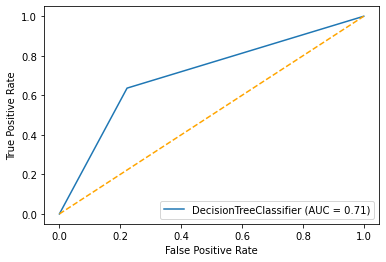

In [45]:
metrics.plot_roc_curve(clf, X_test, Y_test)  
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.show()